In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

## Evaluación del modelo con MSE - RMSE

Definimos una función que nos ayudará a evaluar los resultados predichos versus los resultados originales basados en RMSE de la predicción de 7 dias adelante, lo que ataca un problema Multy-step y Multy variable

In [2]:
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
        # calculate overall RMSE
        s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores

Definimos una función que nos ayudará a realizar una division de los datos por semanas. Se usaran las semanas del año 2006, 2007, 2008 y 2009 para entrenar y las semanas del año 2010 para predecir. 
Fecha inicio: 2006 -12 - 01
Fecha Fin: 2010 - 11 - 15


In [3]:
# split a univariate dataset into train/test sets
def split_dataset(data):
    # split into standard weeks
    train, test = data[1:-328], data[-328:-6]
    # restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test

# Split data tran and Test

159 semanas de train

46 semanas de test

In [4]:
dataset = read_csv('household_power_consumption_days.csv', header=0,
infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
train, test = split_dataset(dataset.values)
# validate train data
print(train.shape)
print(train[0, 0, 0], train[-1, -1, 0])
# validate test
print(test.shape)
print(test[0, 0, 0], test[-1, -1, 0])

(159, 7, 8)
3390.46 1309.2679999999998
(46, 7, 8)
2083.4539999999993 2197.006000000004


In [5]:
def evaluate_model(model_func, train, test):
# history is a list of weekly data
    history = [x for x in train]
    # walk-forward validation over each week
    predictions = list()
    for i in range(len(test)):
        # predict the week
        yhat_sequence = model_func(history)
        # store the predictions
        predictions.append(yhat_sequence)
        # get real observation and add to history for predicting the next week
        history.append(test[i, :])
    predictions = array(predictions)
    # evaluate predictions days for each week
    score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    return score, scores

In [6]:
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))

# Naive Model

1. Daily Persistence Forecast.

2. Weekly Persistent Forecast.

3. Weekly One-Year-Ago Persistent Forecast.


In [7]:
def daily_persistence(history):
    # get the data for the prior week
    last_week = history[-1]
    # get the total active power for the last day
    value = last_week[-1, 0]
    # prepare 7 day forecast
    forecast = [value for _ in range(7)]
    return forecast
def weekly_persistence(history):
    # get the data for the prior week
    last_week = history[-1]
    return last_week[:, 0]

# week one year ago persistence model
def week_one_year_ago_persistence(history):
    # get the data for the prior week
    last_week = history[-52]
    return last_week[:, 0]


In [8]:
# define the names and functions for the models we wish to evaluate
models = dict()
models['daily'] = daily_persistence
models['weekly'] = weekly_persistence
models['week-oya'] = week_one_year_ago_persistence

daily persistence: [511.886] 452.9, 596.4, 532.1, 490.5, 534.3, 481.5, 482.0
daily persistence: [469.389] 567.6, 500.3, 411.2, 466.1, 471.9, 358.3, 482.0
daily persistence: [465.294] 550.0, 446.7, 398.6, 487.0, 459.3, 313.5, 555.1


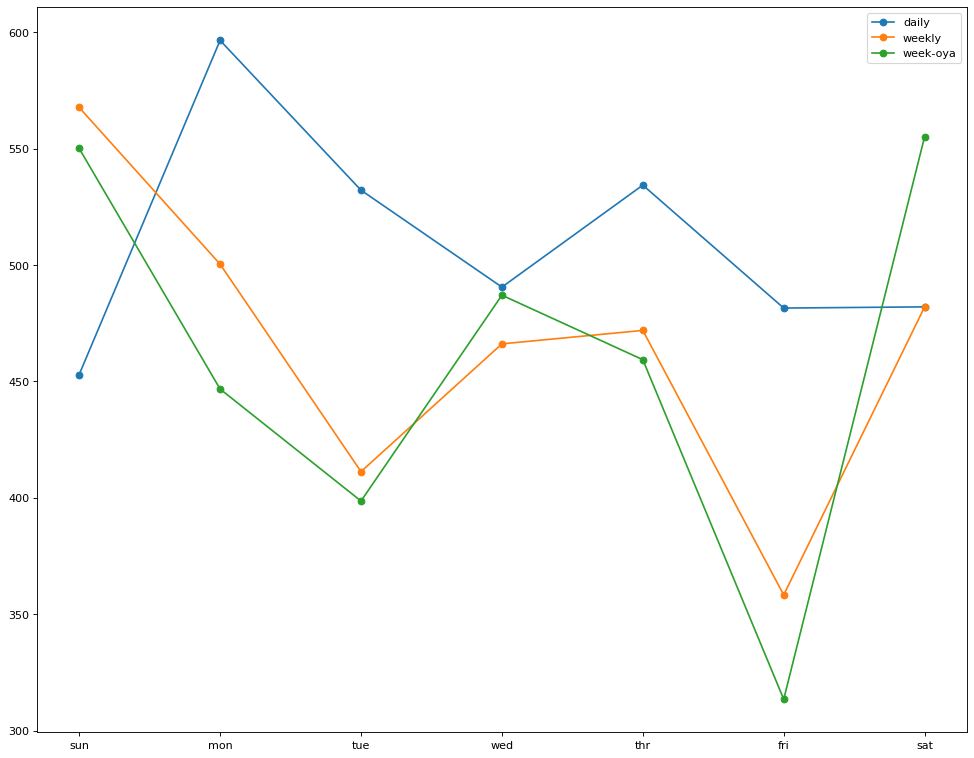

In [9]:
# evaluate each model
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.figure(figsize=(15, 12), dpi=80)
for name, func in models.items():
    # evaluate and get scores
    score, scores = evaluate_model(func, train, test)
    # summarize scores
    summarize_scores('daily persistence', score, scores)
    # plot scores
    pyplot.plot(days, scores, marker='o', label=name)
pyplot.legend()
pyplot.show()

In [19]:
remainder = lambda num: num % 2
print(remainder(5))



numbers_list = [2, 6, 8, 10, 11, 4, 12, 7, 13, 17, 0, 3, 21]

filtered_list = list(   filter(    lambda num: (num > 7)    ,   numbers_list    )     )

print(filtered_list)



numbers_list = [2, 6, 8, 10, 11, 4, 12, 7, 13, 17, 0, 3, 21]

mapped_list = list(map(lambda num: num % 2, numbers_list))

print(mapped_list)



o = [print(x) for x in range(5)]


[8, 10, 11, 12, 13, 17, 21]
